<a href="https://colab.research.google.com/github/blaise-fonguh/Cognizant_AI_task/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pandas


In [4]:
import pandas as pd

In [6]:
# loading the diabetes dataset to a pandas Dataframe
path = "/content/drive/MyDrive/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head(10)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash
6,4997b1ae-f5aa-4b9f-8fc8-22ad8f19837c,2022-03-07 19:36:57,14736243-d346-438f-9535-d80fcb9f3882,fruit,standard,1.49,4,5.96,e-wallet
7,bfffee68-0736-42af-bd3e-4ca77541b0d6,2022-03-07 19:03:20,0ddc2379-adba-4fb0-aa97-19fcafc738a1,fruit,basic,3.99,4,15.96,credit card
8,ce50e984-90cd-4b47-8537-3a4e32e6d314,2022-03-07 11:34:32,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,non-member,3.99,1,3.99,credit card
9,f0700cc9-e6f5-4b9a-add4-05e64b4f495b,2022-03-07 09:20:12,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,premium,0.49,3,1.47,e-wallet


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [11]:
df.shape

(7829, 9)

In [18]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [19]:
!pip install seaborn

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


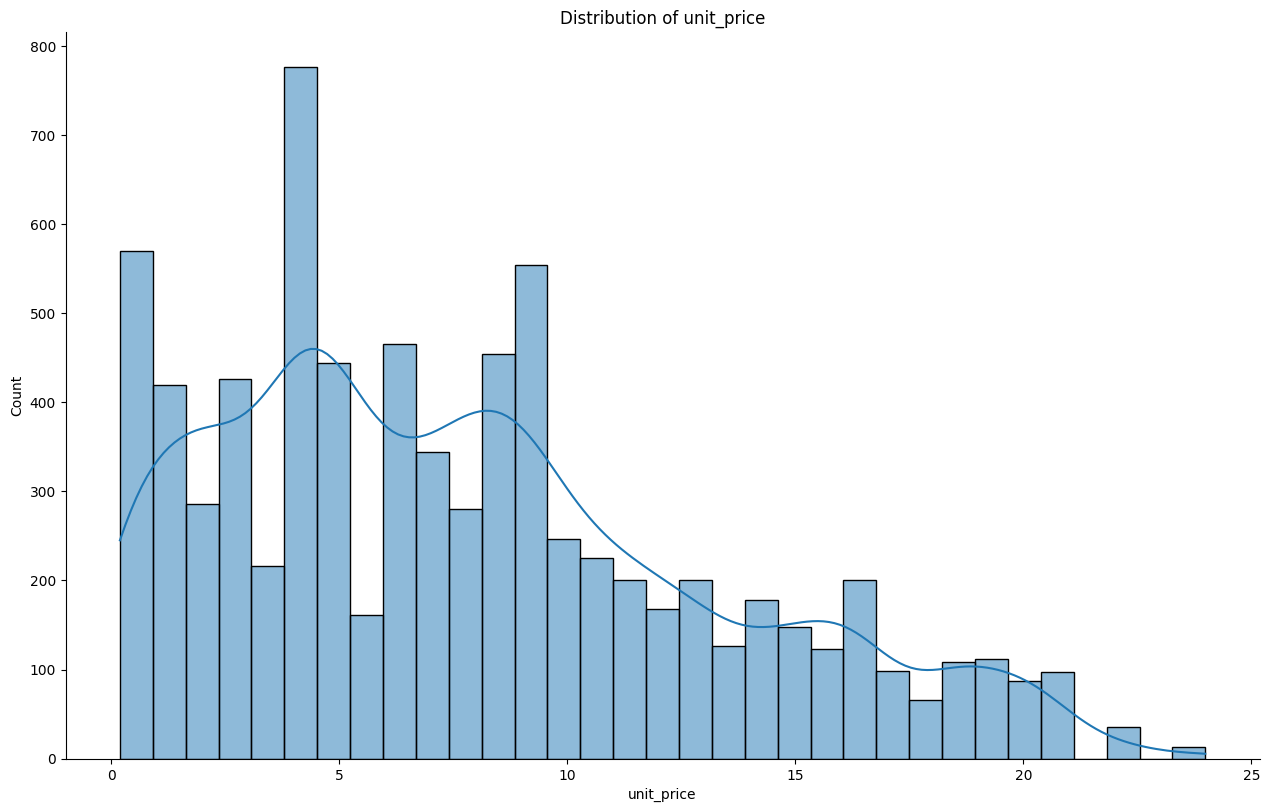

In [38]:
#plotting the continous distribution
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
    _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5)
    plt.title(f'Distribution of unit_price')
    plt.show()

plot_continuous_distribution(df, 'unit_price', height=8)

In [37]:
#getting the unique values
def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

get_unique_values(df, 'unit_price')

Column: unit_price has 64 unique values

3.99     374
4.99     374
1.49     321
0.49     306
8.19     272
        ... 
21.99     17
20.99     17
23.99     13
17.99     12
20.19     11
Name: unit_price, Length: 64, dtype: int64


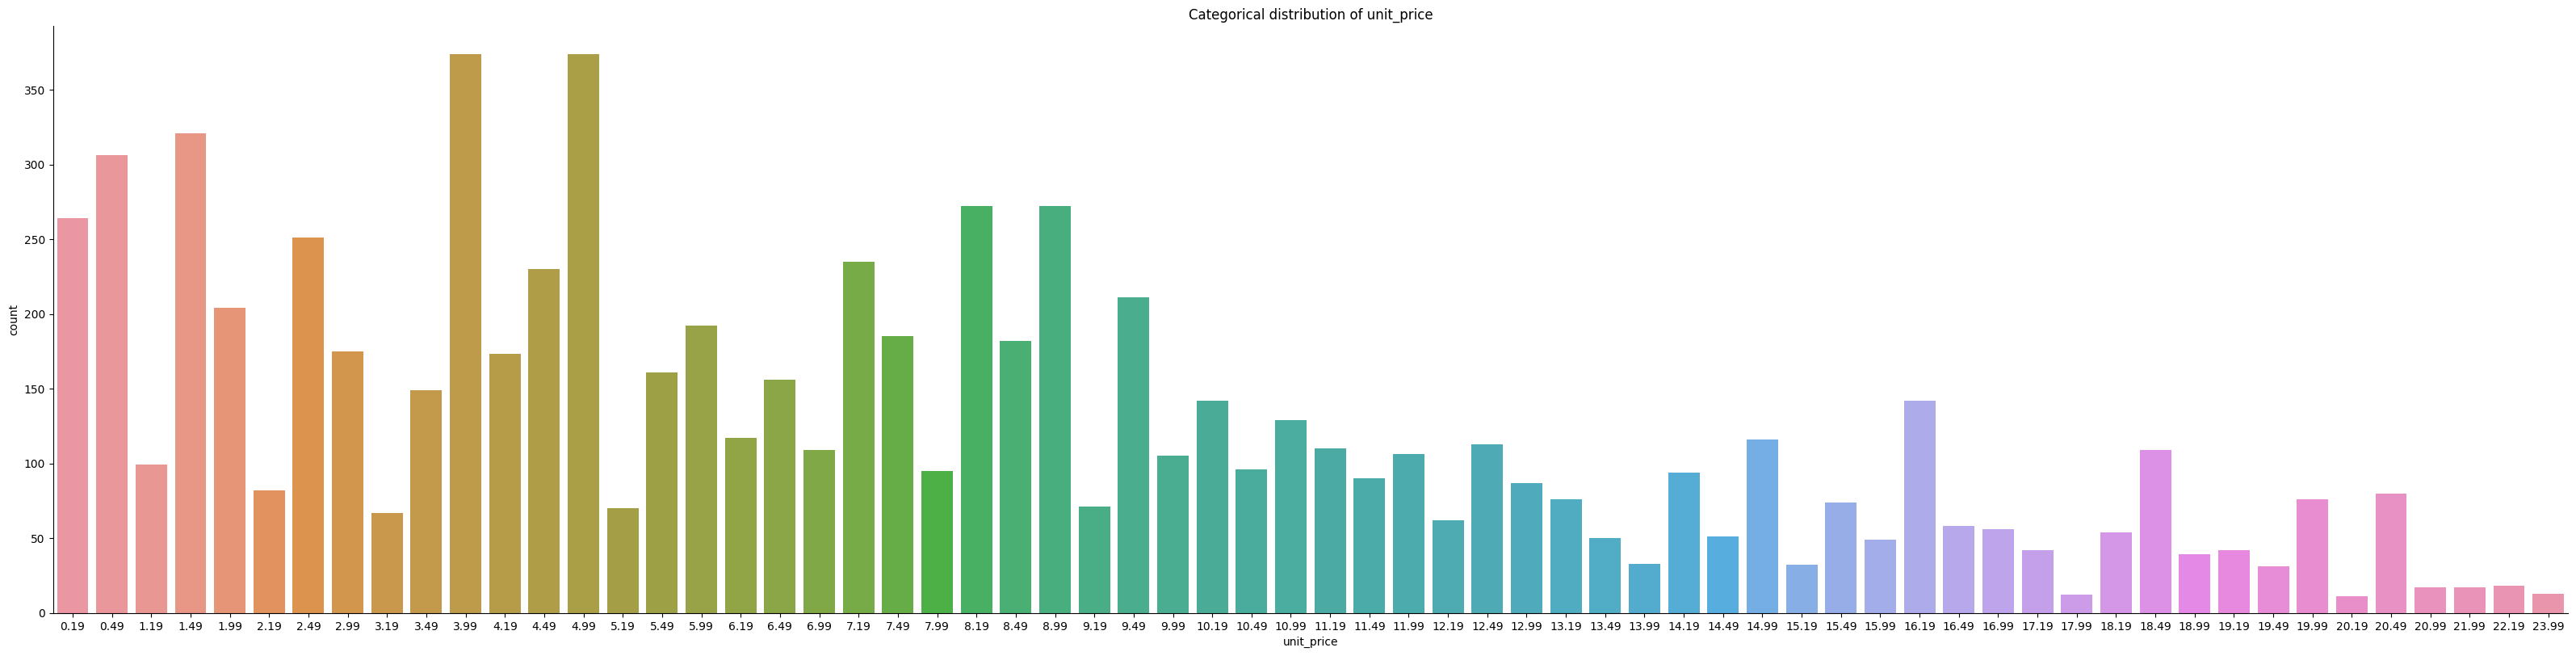

In [42]:
#getting the categorical distribution plot
def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
    _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');
    plt.title(f'Categorical distribution of unit_price')
    plt.show()

plot_categorical_distribution(df,'unit_price', height = 8, aspect = 4)

In [49]:
# showing the correlations betweem the numeric columns
def correlation_plot(data: pd.DataFrame = None):
    if data is None:
        raise ValueError("You must provide a DataFrame for correlation analysis.")

    # Select the specific numeric columns for correlation analysis
    numeric_cols = data[['unit_price', 'total', 'quantity']]

    if numeric_cols.empty:
        raise ValueError("No numeric columns found in the DataFrame.")

    corr = numeric_cols.corr()
    corr.style.background_gradient(cmap='coolwarm')
    plt.show()

# Call the function with your DataFrame 'df'
correlation_plot(df)
